In [1]:
import pandas as pd
%matplotlib inline

This gets pretty much all recent data logger temperature data from RCL

In [2]:
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU001&typeID=t&days=5000&methodID=logic'
df = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
df.head()

,t (C)
date-time,
2009-04-15 02:00:00,30.07
2009-04-15 03:00:00,29.25
2009-04-15 04:00:00,28.51
2009-04-15 05:00:00,27.22
2009-04-15 06:00:00,27.15


Data unevenly sampled, resample as daily mean

In [3]:
dfday = df.resample('D').mean()
dfday.head()

,t (C)
date-time,
2009-04-15,27.664545
2009-04-16,27.598750
2009-04-17,27.520417
2009-04-18,27.800833
2009-04-19,27.623750


daily mean has some NaN values, days with no temperature measurements, drop rows with these

In [4]:
dfday.dropna(inplace=True)
len(dfday[' t (C)'])

2884

In [5]:
dfday[' t (C)'].describe()

count    2884.000000
mean       25.541495
std         6.741948
min        12.595000
25%        20.659687
50%        23.900682
75%        30.740000
max        45.637083
Name:  t (C), dtype: float64

time-series plot, raw data, daily mean values, superimpose median (red), 0.25, 0.75 (green), 0.05, 0.95 (black)

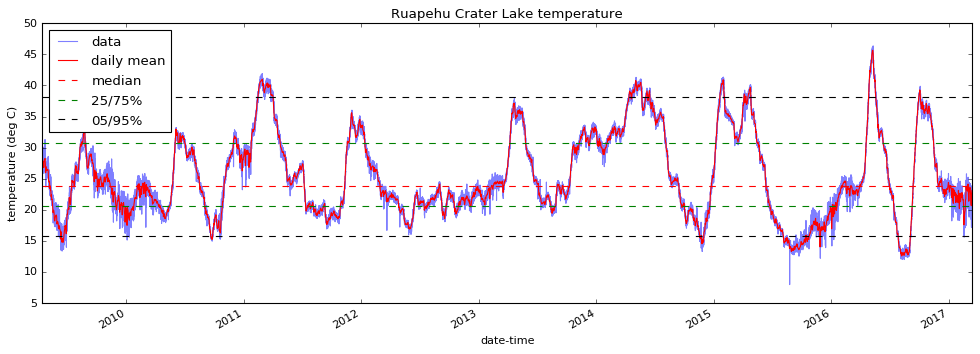

In [11]:
temp = df[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature', alpha = 0.5, label='data')
temp.set_ylabel("temperature (deg C)")
dfday[' t (C)'].plot(ax=temp, color='red', label='daily mean')

temp.axhline(dfday[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

temp.axhline(dfday[' t (C)'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1, label='25/75%')
temp.axhline(dfday[' t (C)'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1)

temp.axhline(dfday[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
temp.axhline(dfday[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

tp = temp.legend(loc='best')

In [12]:
fig = tp.get_figure()
fig.savefig('rcltemp_plot.png', dpi=200)

histogram, one bin per degree

In [7]:
trange = dfday[' t (C)'].max() - dfday[' t (C)'].min()
print int(trange)

33


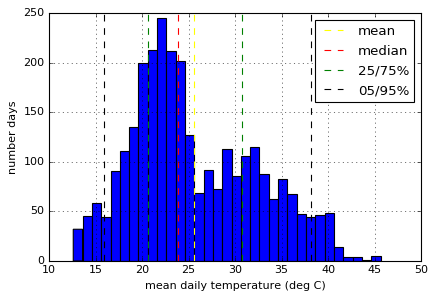

In [8]:
hist = dfday[' t (C)'].hist(bins=int(trange))
hist.set_ylabel("number days")
hist.set_xlabel("mean daily temperature (deg C)")

hist.axvline(dfday[' t (C)'].mean(), color='yellow', linestyle='dashed', linewidth=1, label='mean')
hist.axvline(dfday[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

hist.axvline(dfday[' t (C)'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1, label='25/75%')
hist.axvline(dfday[' t (C)'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1)

hist.axvline(dfday[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
hist.axvline(dfday[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

hp = hist.legend(loc='best')

In [9]:
fig = hp.get_figure()
fig.savefig('rcltemp_hist.png', dpi=200)